<a href="https://colab.research.google.com/github/Angela-col/Talento-Tech/blob/main/Laboratorio_1_Talento_Tech_Angela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorio # 1

Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

**1.El problema del negocio**
Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.
¿Qué perfil tienen los clientes con mayor potencial de conversión?

**2.El set de datos**
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.
Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:
1. "age": edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


**3.Una primera mirada al dataset**

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt #libreria nos permite graficar
import seaborn as sns #libreria nos permite graficar

In [3]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/Colab Notebooks/Practica BootCamp/dataset_banco.csv"
data = pd.read_csv(ruta)

Mounted at /content/drive


**Visualización y Exploración de Datos:**

* df.head(): Muestra las primeras filas del DataFrame.
* df.tail(): Muestra las últimas filas del DataFrame.
* df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
* df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
* df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
* df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

**Transformación de nombres de atributos**

In [4]:
#Información de la data
print("Información de la data")
data.info()

Información de la data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [5]:
#Primeras filas del data frame
print("primeras filas del data frame")
data.head()

primeras filas del data frame


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [6]:
#Desprición de la data
print("Descripción de la data")
data.describe()

Descripción de la data


,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#renombramos las columnas
data = data.rename(columns={
    "age": "edad",
    "job": "trabajo",
    "marital": "estado_civil",
    "education": "nivel_educativo",
    "default": "deuda",
    "balance": "saldo_anual",
    "housing": "credito_hipotecario",
    "loan": "credito_consumo",
    "contact": "medio_contacto",
    "day": "ultimo_dia",
    "month": "ultimo_mes",
    "duration": "duracion",
    "campaign": "numero_contacto",
    "pdays": "dias_pasados",
    "previous": "numero_contacto_anterior",
    "poutcome": "resultado_anterior",
    "y": "respuesta"
})

In [8]:
#comando para conocer que no esta depurado
data.isna().sum()

edad                        0
trabajo                     2
estado_civil                1
nivel_educativo             1
deuda                       0
saldo_anual                 2
credito_hipotecario         0
credito_consumo             0
medio_contacto              0
ultimo_dia                  0
ultimo_mes                  0
duracion                    1
numero_contacto             0
dias_pasados                1
numero_contacto_anterior    0
resultado_anterior          0
respuesta                   0
dtype: int64

In [9]:
#Elimino los valores faltantes del data frame
data.dropna(inplace=True)
#Conteo de valores del data frame
data.count

<bound method DataFrame.count of        edad       trabajo estado_civil nivel_educativo deuda  saldo_anual  \
0        58    management      married        tertiary    no       2143.0   
1        44    technician       single       secondary    no         29.0   
2        33  entrepreneur      married       secondary    no          2.0   
3        47   blue-collar      married         unknown    no       1506.0   
4        33       unknown       single         unknown    no          1.0   
...     ...           ...          ...             ...   ...          ...   
45210    51    technician      married        tertiary    no        825.0   
45211    71       retired     divorced         primary    no       1729.0   
45212    72       retired      married       secondary    no       5715.0   
45213    57   blue-collar      married       secondary    no        668.0   
45214    37  entrepreneur      married       secondary    no       2971.0   

      credito_hipotecario credito_consumo medio_contacto  ultimo_dia  \
0                     yes              no        unknown           5   
1                     yes              no        unknown           5   
2                     yes             yes        unknown           5   
3                     yes              no        unknown           5   
4                      no              no        unknown           5   
...                   ...             ...            ...         ...   
45210                  no              no       cellular          17   
45211                  no              no       cellular          17   
45212                  no              no       cellular          17   
45213                  no              no      telephone          17   
45214                  no              no       cellular          17   

      ultimo_mes  duracion  numero_contacto  dias_pasados  \
0            may     261.0                1          -1.0   
1            may     151.0                1          -1.0   
2            may      76.0                1          -1.0   
3            may      92.0                1          -1.0   
4            may     198.0                1          -1.0   
...          ...       ...              ...           ...   
45210        nov     977.0                3          -1.0   
45211        nov     456.0                2          -1.0   
45212        nov    1127.0                5         184.0   
45213        nov     508.0                4          -1.0   
45214        nov     361.0                2         188.0   

       numero_contacto_anterior resultado_anterior respuesta  
0                             0            unknown        no  
1                             0            unknown        no  
2                             0            unknown        no  
3                             0            unknown        no  
4                             0            unknown        no  
...                         ...                ...       ...  
45210                         0            unknown       yes  
45211                         0            unknown       yes  
45212                         3            success       yes  
45213                         0            unknown        no  
45214                        11              other        no  

[45207 rows x 17 columns]>

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

**4.1 Datos faltantes**

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [10]:
#Comando para contar los valores faltantes de mi dataframe
data.isna().sum()

edad                        0
trabajo                     0
estado_civil                0
nivel_educativo             0
deuda                       0
saldo_anual                 0
credito_hipotecario         0
credito_consumo             0
medio_contacto              0
ultimo_dia                  0
ultimo_mes                  0
duracion                    0
numero_contacto             0
dias_pasados                0
numero_contacto_anterior    0
resultado_anterior          0
respuesta                   0
dtype: int64

In [11]:
#elimino los valores faltantes de mi dataframe
data.dropna(inplace=True)

#conteo de valores por columna de mi dataframe
data.count

<bound method DataFrame.count of        edad       trabajo estado_civil nivel_educativo deuda  saldo_anual  \
0        58    management      married        tertiary    no       2143.0   
1        44    technician       single       secondary    no         29.0   
2        33  entrepreneur      married       secondary    no          2.0   
3        47   blue-collar      married         unknown    no       1506.0   
4        33       unknown       single         unknown    no          1.0   
...     ...           ...          ...             ...   ...          ...   
45210    51    technician      married        tertiary    no        825.0   
45211    71       retired     divorced         primary    no       1729.0   
45212    72       retired      married       secondary    no       5715.0   
45213    57   blue-collar      married       secondary    no        668.0   
45214    37  entrepreneur      married       secondary    no       2971.0   

      credito_hipotecario credito_consumo medio_contacto  ultimo_dia  \
0                     yes              no        unknown           5   
1                     yes              no        unknown           5   
2                     yes             yes        unknown           5   
3                     yes              no        unknown           5   
4                      no              no        unknown           5   
...                   ...             ...            ...         ...   
45210                  no              no       cellular          17   
45211                  no              no       cellular          17   
45212                  no              no       cellular          17   
45213                  no              no      telephone          17   
45214                  no              no       cellular          17   

      ultimo_mes  duracion  numero_contacto  dias_pasados  \
0            may     261.0                1          -1.0   
1            may     151.0                1          -1.0   
2            may      76.0                1          -1.0   
3            may      92.0                1          -1.0   
4            may     198.0                1          -1.0   
...          ...       ...              ...           ...   
45210        nov     977.0                3          -1.0   
45211        nov     456.0                2          -1.0   
45212        nov    1127.0                5         184.0   
45213        nov     508.0                4          -1.0   
45214        nov     361.0                2         188.0   

       numero_contacto_anterior resultado_anterior respuesta  
0                             0            unknown        no  
1                             0            unknown        no  
2                             0            unknown        no  
3                             0            unknown        no  
4                             0            unknown        no  
...                         ...                ...       ...  
45210                         0            unknown       yes  
45211                         0            unknown       yes  
45212                         3            success       yes  
45213                         0            unknown        no  
45214                        11              other        no  

[45207 rows x 17 columns]>

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# **for col in cols_cat:**
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

In [32]:
#conteo de los niveles en las diferentes columnas categóricas
cols_cat = ["trabajo" , "estado_civil" , "nivel_educativo" , "deuda" , "credito_hipotecario" , "credito_consumo" , "medio_contacto" , "ultimo_mes" , "resultado_anterior"]
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna nivel_educativo: 10 subniveles
Columna deuda: 2 subniveles
Columna credito_hipotecario: 2 subniveles
Columna credito_consumo: 6 subniveles
Columna medio_contacto: 5 subniveles
Columna ultimo_mes: 12 subniveles
Columna resultado_anterior: 6 subniveles


In [13]:
#Conteo los valores
pd.value_counts(data["trabajo"])

trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.

In [33]:
#Calcular la desviación estandar para las columnas numéricas
desviaciones_estandar = data[['edad', 'saldo_anual', 'ultimo_dia', 'duracion', 'numero_contacto', 'dias_pasados', 'numero_contacto_anterior']]


In [34]:
#desviacion estandar para la variable 'pdays'
destd_pdays = data[['dias_pasados']].std()

# Imprimir las desviaciones estándar
print(destd_pdays)

dias_pasados    100.108865
dtype: float64


4.3 Filas repetidas

In [35]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45193, 17)
Tamaño del set después de eliminar las filas repetidas: (45193, 17)


4.4 Outliers en las variables numéricas
No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.
Creemos gráficas tipo "boxplot" de las columnas numéricas:

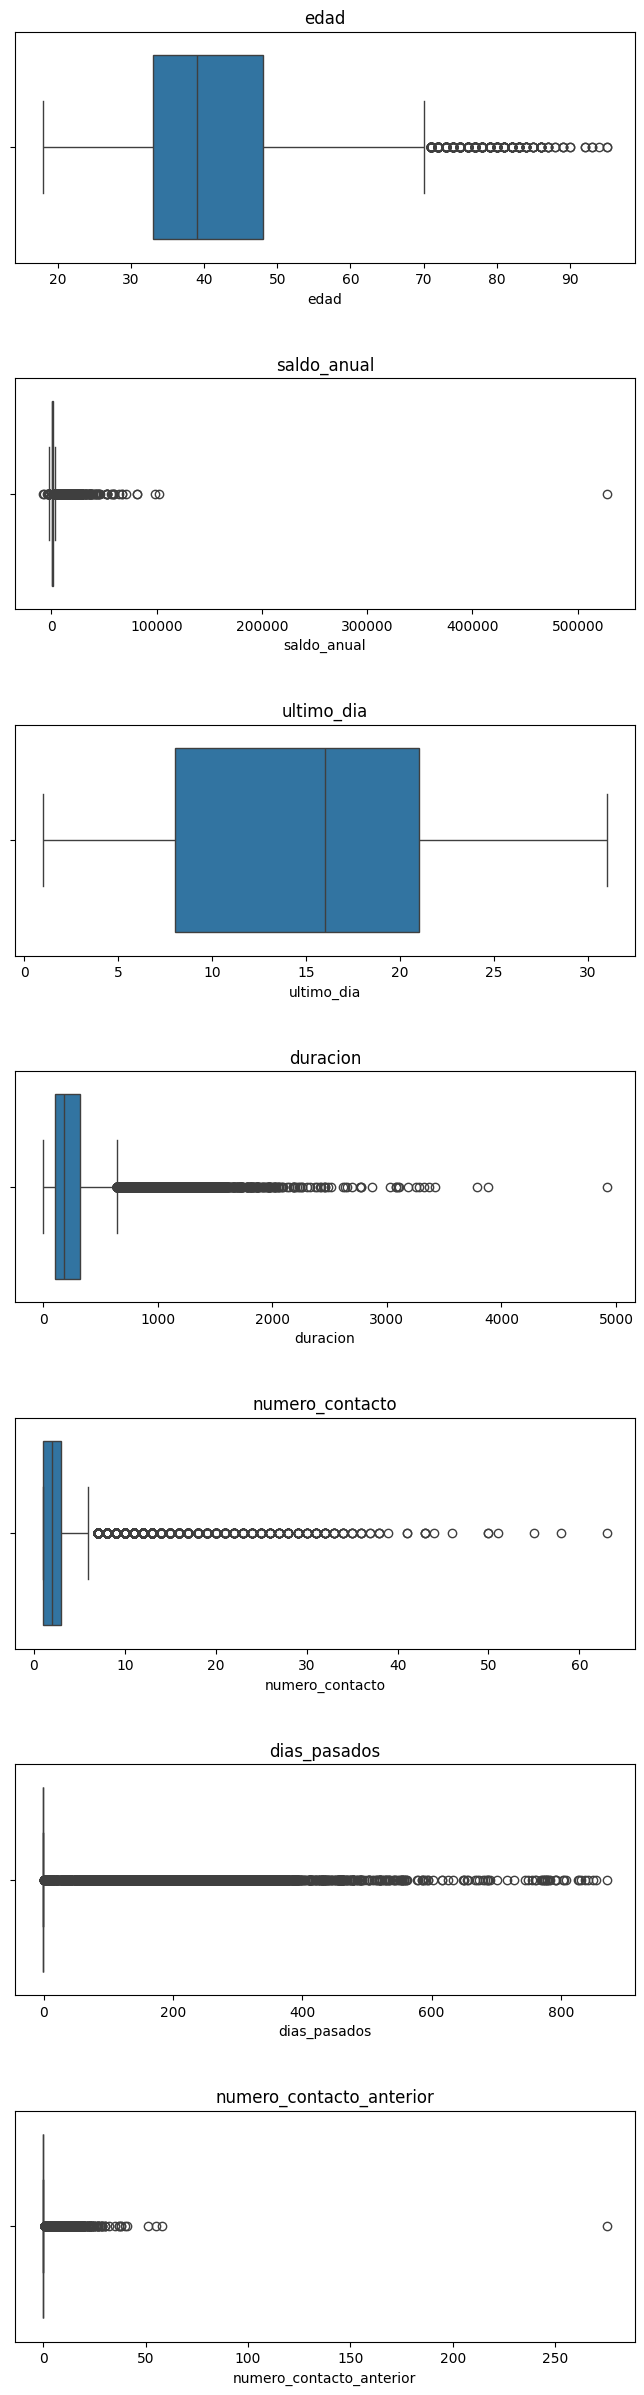

In [36]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo_anual', 'ultimo_dia', 'duracion', 'numero_contacto',
            'dias_pasados', 'numero_contacto_anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Observaciones:
"age": hay sujetos con edades mucho mayores a 100 años
"duration": hay valores negativos
"previous": hay un valor extremadamente alto (cercano a 300)

In [37]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45193, 17)
Tamaño del set después de eliminar registros de edad: (45193, 17)


In [38]:
# Eliminar filas con "duracion"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duracion']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45193, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.
Se deben unificar estos sub-niveles

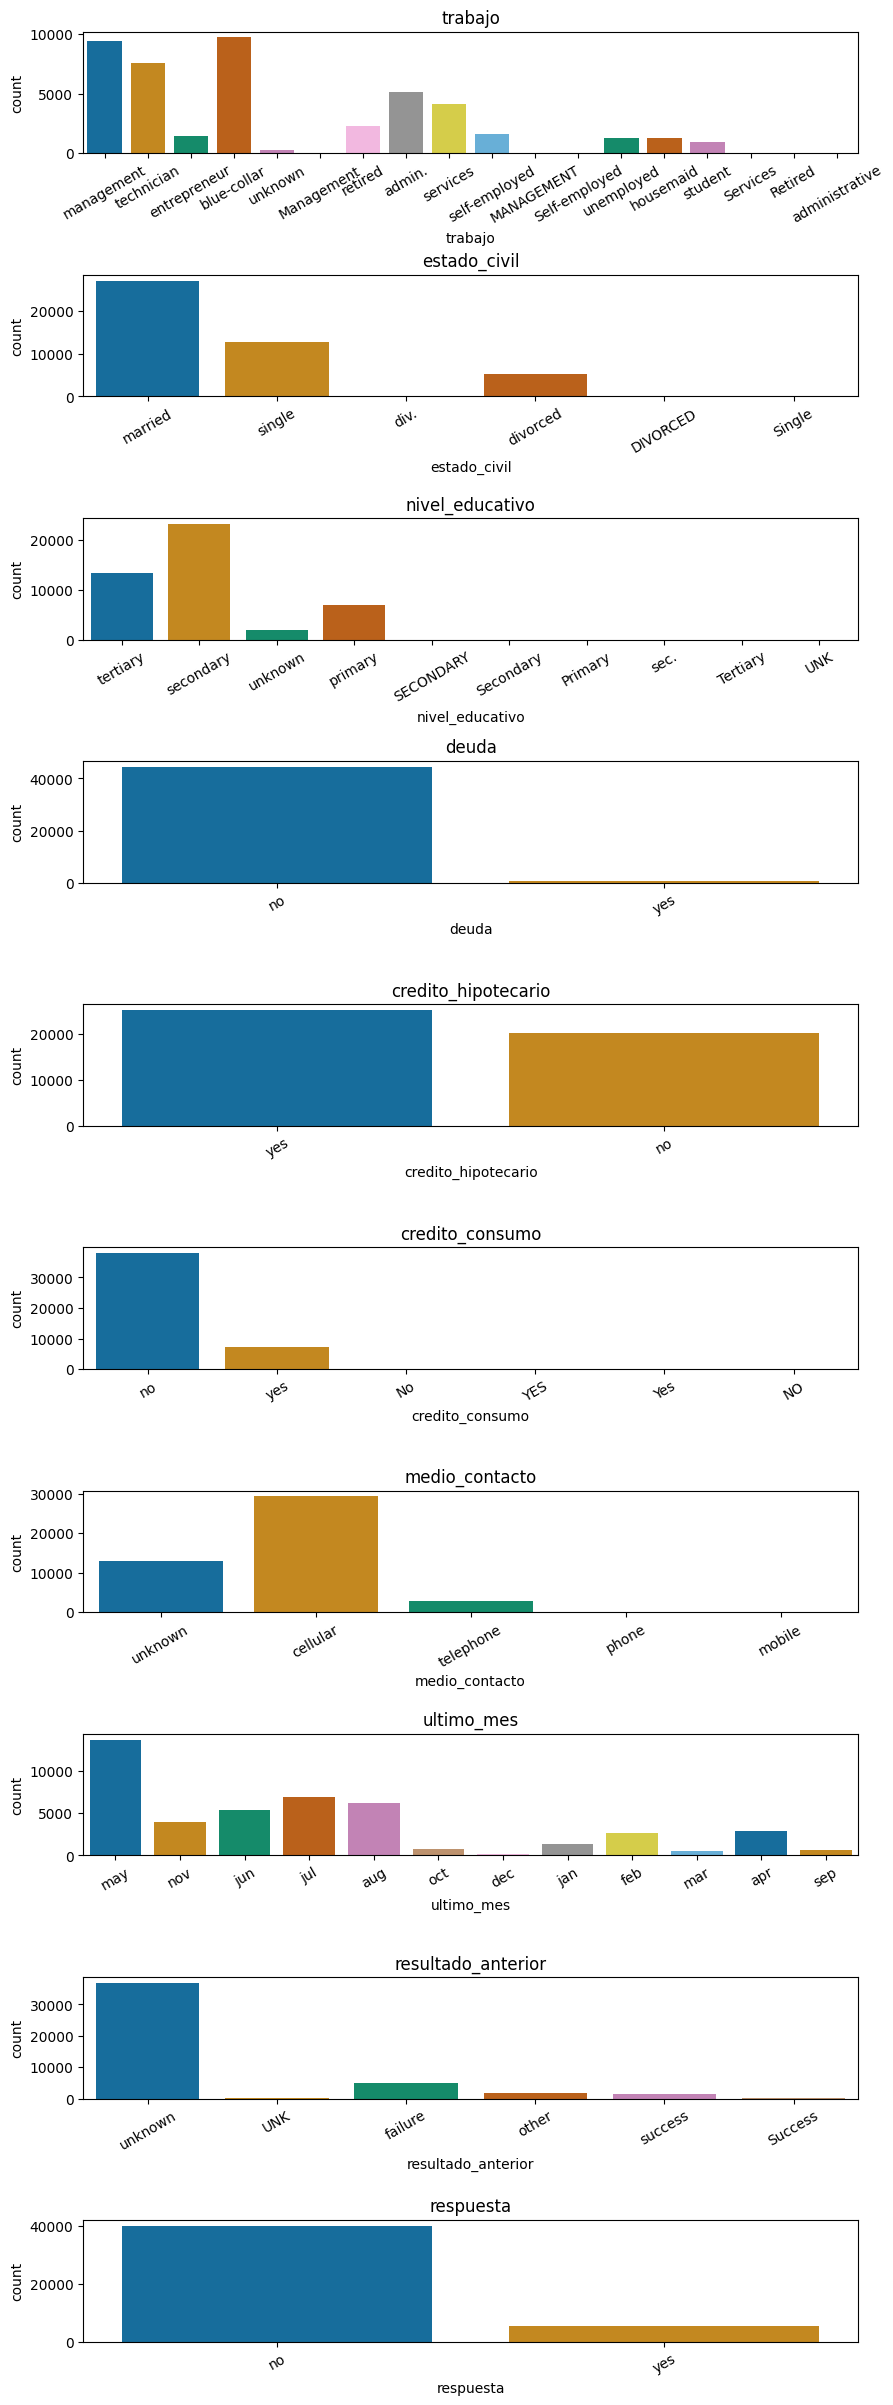

In [40]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'nivel_educativo', 'deuda', 'credito_hipotecario',
       'credito_consumo', 'medio_contacto', 'ultimo_mes', 'resultado_anterior', 'respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

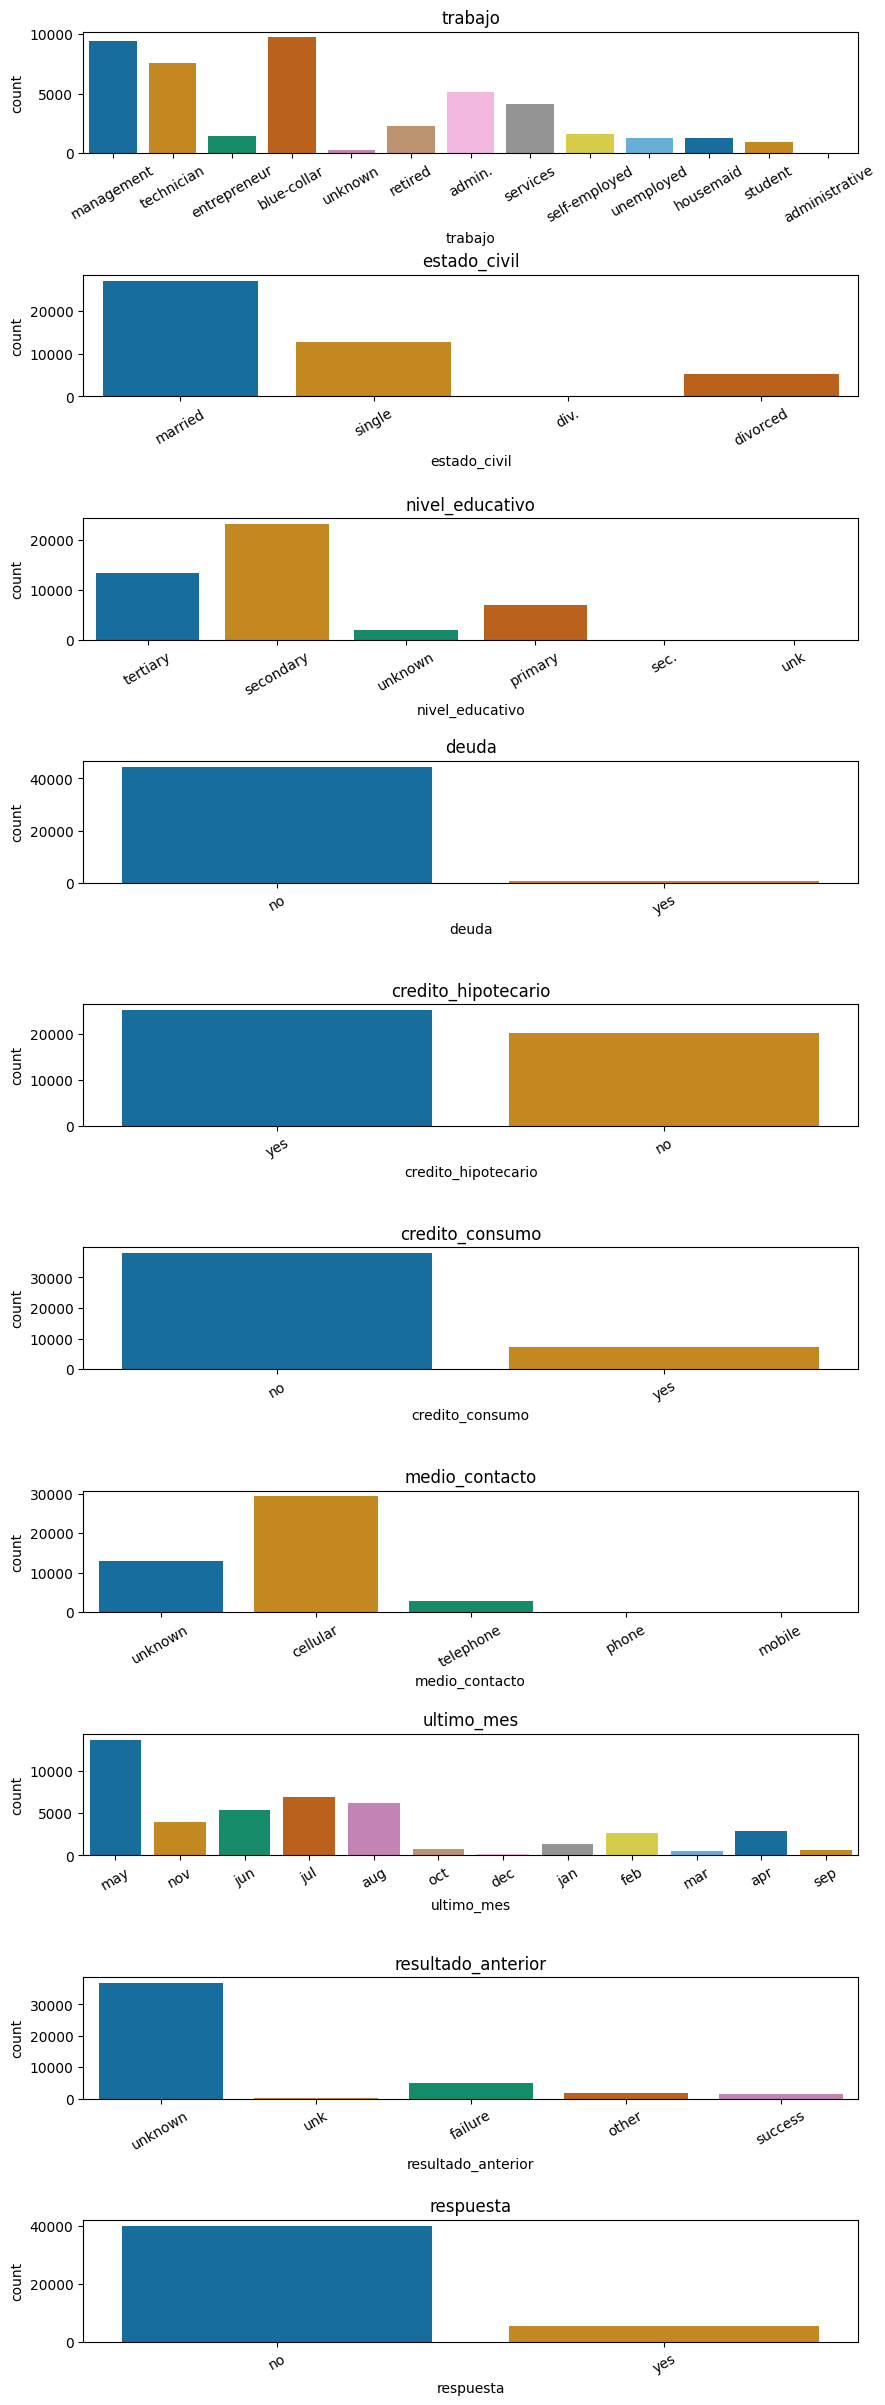

In [41]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [47]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [48]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'divorced']
['married' 'single' 'divorced']


In [49]:
# education: unificar sec. y secondary, unk y unknown
print(data['nivel_educativo'].unique())
data['nivel_educativo'] = data['nivel_educativo'].str.replace('sec.','secondary', regex=False)
data.loc[data['nivel_educativo']=='unk','nivel_educativo'] = 'unknown'
print(data['nivel_educativo'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [50]:
# contact: unificar telephone y phone
print(data['medio_contacto'].unique())
data.loc[data['medio_contacto']=='phone','medio_contacto'] = 'telephone'
data.loc[data['medio_contacto']=='mobile','medio_contacto'] = 'cellular'
print(data['medio_contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [51]:
# poutcome: unificar unk y unknown
print(data['resultado_anterior'].unique())
data.loc[data['resultado_anterior']=='unk','resultado_anterior']='unknown'
print(data['resultado_anterior'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']
